In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
import ast

In [2]:
face_rep = pd.read_csv("facial_similarity_reports.csv", delimiter=',',index_col=0,header=0)
doc_rep = pd.read_csv("doc_reports.csv", delimiter=',',index_col=0,header=0)

# Functions for Data Handling

In [3]:
#parsing datetime

def data_prep(df_file):
    df_file.created_at=pd.to_datetime(df_file.created_at,errors='coerce', format='%Y-%m-%d %H:%M:%S')
    df_file.fillna(np.nan)

#replacing the term clear, unidentified and consider with 0, 1 and 1
#so that we can create a correlation matrix to check for systemic issues

column_list=['result_doc', "visual_authenticity_result_doc","image_integrity_result",'police_record_result','compromised_document_result', 
             "face_detection_result", "image_quality_result", "supported_document_result",'conclusive_document_quality_result','colour_picture_result',
             'data_validation_result','data_consistency_result','data_comparison_result','face_comparison_result','facial_image_integrity_result',
             'visual_authenticity_result_face','result_face']

binary_dict={"clear":0,"unidentified":1,"consider":1}

#fuction to map the terms clear, unidentified and consider with 0, 1 and 1

def df_transform(columns, dataframe):
    for i in columns:
        dataframe[i]=dataframe[i].map(binary_dict)

# Data Cleaning & Translation

In [4]:
data_prep(doc_rep)
data_prep(face_rep)

# Checking data before Merger

In [5]:
#checking unique identifiers are same for both dataframe
face_rep['user_id'].equals(doc_rep['user_id'])

True

In [6]:
face_rep['attempt_id'].equals(doc_rep['attempt_id'])

False

In [7]:
#checking if it is a recurring issue or an aberrent issue
id_doc = doc_rep['attempt_id']
id_face = face_rep['attempt_id']
for i in doc_rep.index:
    if id_doc[i] != id_face[i]:
        print('index: {}, id_doc: {}, id_face: {}'.format(i, id_doc[i], id_face[i]))

index: 174083, id_doc: 9.6949E+31, id_face: 96948966045741509980950989095520


In [8]:
df = pd.merge(doc_rep, face_rep, on='attempt_id', how='left', suffixes=('_doc', '_face'), validate='one_to_one')
df = df.drop([ 'user_id_face',  'created_at_face', 'properties_face'], axis=1)

In [9]:
df.head()

,user_id_doc,result_doc,visual_authenticity_result_doc,image_integrity_result,face_detection_result,image_quality_result,created_at_doc,supported_document_result,conclusive_document_quality_result,colour_picture_result,...,data_comparison_result,attempt_id,police_record_result,compromised_document_result,properties_doc,sub_result,result_face,face_comparison_result,facial_image_integrity_result,visual_authenticity_result_face
0,ab23fae164e34af0a1ad1423ce9fd9f0,consider,consider,clear,clear,clear,2017-06-20 23:12:57+00:00,clear,NaN,NaN,...,NaN,050a0596de424fab83c433eaa18b3f8d,clear,NaN,"{'gender': 'Male', 'nationality': 'IRL', 'docu...",caution,clear,clear,clear,consider
1,15a84e8951254011b47412fa4e8f65b8,clear,clear,clear,clear,clear,2017-06-20 23:16:04+00:00,clear,NaN,NaN,...,NaN,f69c1e5f45a64e50a26740b9bfb978b7,clear,NaN,"{'gender': 'Female', 'document_type': 'driving...",clear,clear,clear,clear,clear
2,ffb82fda52b041e4b9af9cb4ef298c85,clear,clear,clear,clear,clear,2017-06-20 17:59:49+00:00,clear,NaN,NaN,...,NaN,f9f84f3055714d8e8f7419dc984d1769,clear,NaN,"{'gender': 'Male', 'nationality': 'ITA', 'docu...",clear,clear,clear,clear,clear
3,bd4a8b3e3601427e88aa1d9eab9f4290,clear,clear,clear,clear,clear,2017-06-20 17:59:38+00:00,clear,NaN,NaN,...,NaN,10a54a1ecf794404be959e030f11fef6,clear,NaN,"{'gender': 'Male', 'issuing_date': '2007-08', ...",clear,clear,clear,clear,clear
4,f52ad1c7e69543a9940c3e7f8ed28a39,clear,clear,clear,clear,clear,2017-06-20 18:08:09+00:00,clear,NaN,NaN,...,NaN,1f320d1d07de493292b7e0d5ebfb1cb9,clear,NaN,"{'gender': 'Male', 'nationality': 'POL', 'docu...",clear,clear,clear,clear,clear


In [10]:
df_transform(column_list,df)
df.fillna(0,inplace=True)
df.head()

,user_id_doc,result_doc,visual_authenticity_result_doc,image_integrity_result,face_detection_result,image_quality_result,created_at_doc,supported_document_result,conclusive_document_quality_result,colour_picture_result,...,data_comparison_result,attempt_id,police_record_result,compromised_document_result,properties_doc,sub_result,result_face,face_comparison_result,facial_image_integrity_result,visual_authenticity_result_face
0,ab23fae164e34af0a1ad1423ce9fd9f0,1,1.0,0.0,0.0,0.0,2017-06-20 23:12:57+00:00,0.0,0.0,0.0,...,0.0,050a0596de424fab83c433eaa18b3f8d,0.0,0.0,"{'gender': 'Male', 'nationality': 'IRL', 'docu...",caution,0.0,0.0,0.0,1.0
1,15a84e8951254011b47412fa4e8f65b8,0,0.0,0.0,0.0,0.0,2017-06-20 23:16:04+00:00,0.0,0.0,0.0,...,0.0,f69c1e5f45a64e50a26740b9bfb978b7,0.0,0.0,"{'gender': 'Female', 'document_type': 'driving...",clear,0.0,0.0,0.0,0.0
2,ffb82fda52b041e4b9af9cb4ef298c85,0,0.0,0.0,0.0,0.0,2017-06-20 17:59:49+00:00,0.0,0.0,0.0,...,0.0,f9f84f3055714d8e8f7419dc984d1769,0.0,0.0,"{'gender': 'Male', 'nationality': 'ITA', 'docu...",clear,0.0,0.0,0.0,0.0
3,bd4a8b3e3601427e88aa1d9eab9f4290,0,0.0,0.0,0.0,0.0,2017-06-20 17:59:38+00:00,0.0,0.0,0.0,...,0.0,10a54a1ecf794404be959e030f11fef6,0.0,0.0,"{'gender': 'Male', 'issuing_date': '2007-08', ...",clear,0.0,0.0,0.0,0.0
4,f52ad1c7e69543a9940c3e7f8ed28a39,0,0.0,0.0,0.0,0.0,2017-06-20 18:08:09+00:00,0.0,0.0,0.0,...,0.0,1f320d1d07de493292b7e0d5ebfb1cb9,0.0,0.0,"{'gender': 'Male', 'nationality': 'POL', 'docu...",clear,0.0,0.0,0.0,0.0


In [11]:
face_rep.shape

(176404, 8)

In [12]:
doc_rep.shape

(176404, 18)

In [13]:
df.shape

(176404, 22)

In [14]:
df.sort_values(["created_at_doc"], inplace=True)
df.reset_index(drop=True,inplace=True)

# Adding a Pass Column

In [15]:
result_doc=df["result_doc"]==0
result_face=df["result_face"]==0
df['Pass']= result_doc & result_face

# Plots to check if Attempts has diverged widely from New Users

## Basically checking if Fraud attempts have increased

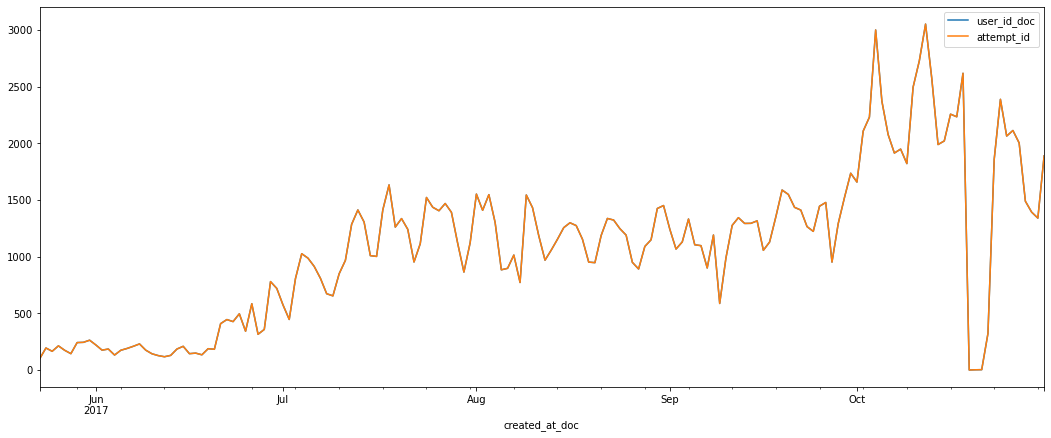

In [16]:
plt.rcParams['figure.figsize'] = (18, 7)
id_list=["user_id_doc","attempt_id"]
df.groupby(pd.Grouper(key='created_at_doc', freq='D'))[id_list].count().plot();

### Attempt Id and User Id are overlapping in the above graph

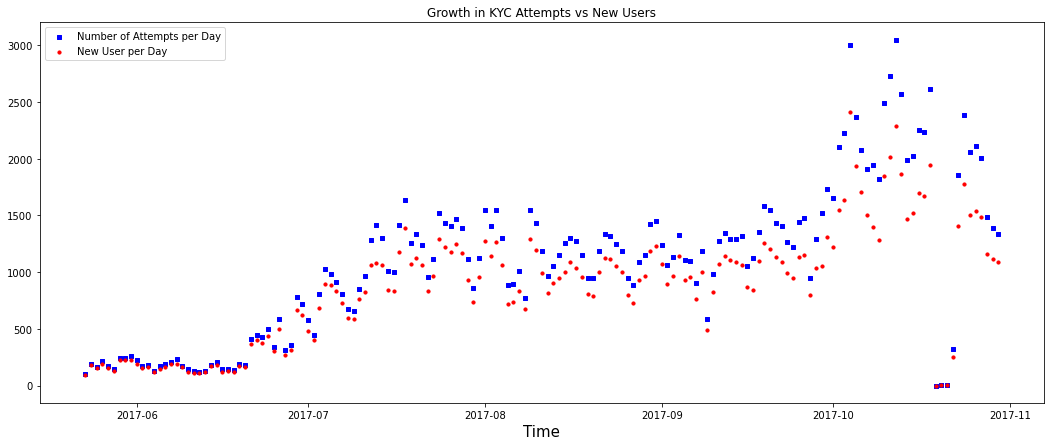

In [17]:
df_new=df.drop(["attempt_id"], axis=1)
df_new.drop_duplicates(subset=['user_id_doc'],inplace=True)

fig = plt.figure()
ax1 = fig.add_subplot(111)

no_of_days = pd.date_range('2017-05-23', '2017-10-31', normalize=False).astype('datetime64[ns, UTC]')

day_count = []
day_count2 = []

for i in range(len(no_of_days)-1):
    upper = df["created_at_doc"] < no_of_days[i+1]
    lower = df["created_at_doc"] > no_of_days[i]
    day_count.append(len(df[upper & lower]))
    
for i in range(len(no_of_days)-1):
    upper = df_new["created_at_doc"] < no_of_days[i+1]
    lower = df_new["created_at_doc"] > no_of_days[i]
    day_count2.append(len(df_new[upper & lower]))
    

ax1.scatter(no_of_days[:-1], day_count, s=10, c='b', marker="s", label='Number of Attempts per Day')
ax1.scatter(no_of_days[:-1], day_count2, s=10, c='r', marker="o", label='New User per Day')
plt.title('Growth in KYC Attempts vs New Users')
plt.xlabel("Time", fontsize=15)
plt.legend(loc='upper left')
plt.savefig('Growth in KYC Attempts vs New Users')
plt.show()

### Analysis: From above graphs, it is clear that Attempts have not diverged excessively from the New users

## Functions to Check trends

In [18]:
def rolling_window(series,window):
    rw = np.cumsum(np.insert(series, 0, 0)) 
    return (rw[window:] - rw[:-window]) / float(window)


def rolling_plot(series,legends,chart_title='',counter=0,window=5000):
    tseries =  df["created_at_doc"].tolist()
    for i in range(len(series)):
        x = series[i].astype(int).tolist()
        rw = rolling_window(x,window)
        index_counter = len(tseries) - len(rw)
        tseries = tseries[index_counter:]
        legend = legends[i]
        tseries = tseries[counter:]
        rw = rw[counter:]
        plt.plot(tseries,rw,label= legend.format(i=i))
    plt.legend(loc='best',prop={'size': 10})
    plt.ylabel("In per Day",fontsize=10)
    plt.xlabel("Time",fontsize=10)
    plt.title(chart_title)
    plt.savefig(chart_title)
    plt.show()
    
def rolling_plot_breakdown(series,legends,chart_title='',counter=0,window=5000):
    for i in range(len(series)):
        series[i] = df[series[i]] == 0
    rolling_plot(series,legends,chart_title,counter,window)

# Checking Pass Rate Against Breakdowns - Facial Similarity Checks & Document Checks

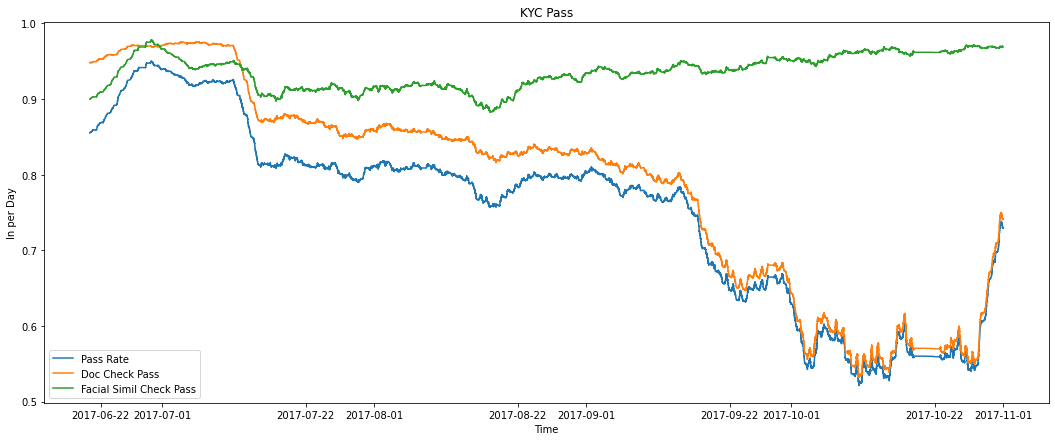

In [19]:
rolling_plot([df['Pass']==True,df["result_doc"] == 0,df["result_face"] == 0],['Pass Rate','Doc Check Pass','Facial Simil Check Pass'],'KYC Pass') 

## Clearly issue is in Document Check Report
### Drilling down on the sub-result ('Document Failure Rate','Rejected','Caution','Suspected') and breakdowns in Doc Check Report

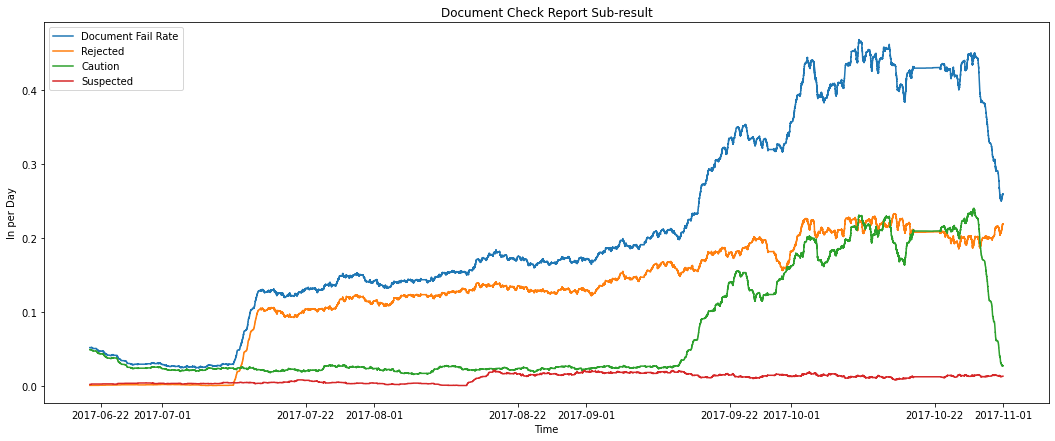

In [20]:
rolling_plot([df["result_doc"] != 0,df['sub_result'] == 'rejected' ,df['sub_result'] == "caution",df['sub_result'] == 'suspected'],['Document Fail Rate','Rejected','Caution','Suspected'],'Document Check Report Sub-result')

### As Document Fail rate increased betwen 1st-22nd July, 2017 so did 'Rejected' increased but in mid September 'Caution' results produced large increase in faliure rate

## Checking for Correlation against other breakdowns

In [21]:
corr_mat  = df.corr(method='pearson')
corr_mat

,result_doc,visual_authenticity_result_doc,image_integrity_result,face_detection_result,image_quality_result,supported_document_result,conclusive_document_quality_result,colour_picture_result,data_validation_result,data_consistency_result,data_comparison_result,police_record_result,compromised_document_result,result_face,face_comparison_result,facial_image_integrity_result,visual_authenticity_result_face,Pass
result_doc,1.000000,0.229319,0.935447,0.099111,0.695039,0.170452,0.500659,0.042131,0.164572,0.053875,0.052591,0.020652,0.019808,0.145879,-0.008010,0.144466,0.229319,-0.922879
visual_authenticity_result_doc,0.229319,1.000000,-0.038290,0.432195,-0.052970,-0.012990,-0.000819,0.183722,0.084061,0.106978,-0.002568,0.016752,0.002312,0.119417,0.005650,0.107168,1.000000,-0.211634
image_integrity_result,0.935447,-0.038290,1.000000,-0.011513,0.743003,0.182214,0.535208,0.045038,-0.031292,-0.012813,-0.016350,-0.001861,-0.000216,0.119413,-0.011642,0.121485,-0.038290,-0.863304
face_detection_result,0.099111,0.432195,-0.011513,1.000000,-0.022893,-0.005614,0.012651,0.010915,0.001729,0.030306,-0.001732,-0.000680,-0.000652,0.164617,-0.001280,0.172549,0.432195,-0.091467
image_quality_result,0.695039,-0.052970,0.743003,-0.022893,1.000000,-0.039372,-0.115646,-0.009732,-0.038803,-0.012445,-0.012148,-0.004770,-0.004575,0.154878,-0.006412,0.158336,-0.052970,-0.641437
supported_document_result,0.170452,-0.012990,0.182214,-0.005614,-0.039372,1.000000,-0.028361,-0.002387,-0.008909,-0.003052,-0.002979,-0.001170,-0.001122,0.053086,0.003226,0.054056,-0.012990,-0.157306
conclusive_document_quality_result,0.500659,-0.000819,0.535208,0.012651,-0.115646,-0.028361,1.000000,0.007015,0.004206,-0.004164,-0.008751,0.003713,0.006022,-0.033776,-0.011023,-0.035357,-0.000819,-0.462047
colour_picture_result,0.042131,0.183722,0.045038,0.010915,-0.009732,-0.002387,0.007015,1.000000,0.002516,0.014299,-0.000736,-0.000289,-0.000277,0.014116,-0.001323,0.014324,0.183722,-0.038882
data_validation_result,0.164572,0.084061,-0.031292,0.001729,-0.038803,-0.008909,0.004206,0.002516,1.000000,0.111247,-0.000985,0.013738,0.004069,0.003082,0.012129,0.000173,0.084061,-0.152269
data_consistency_result,0.053875,0.106978,-0.012813,0.030306,-0.012445,-0.003052,-0.004164,0.014299,0.111247,1.000000,-0.000942,0.030326,-0.000355,0.006429,0.008399,0.005090,0.106978,-0.049720


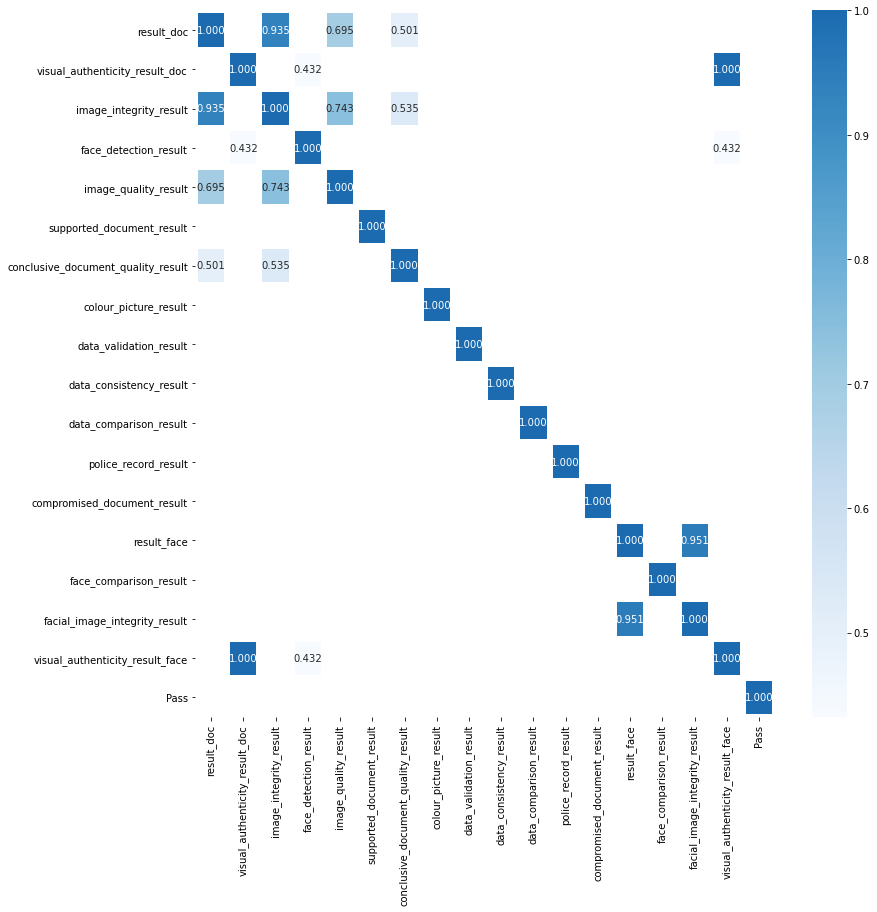

In [22]:
corr_mat = corr_mat.apply(lambda x: [y if y >= 0.3 else np.nan for y in x])
f,ax = plt.subplots(figsize =(13,13))
sns.heatmap(corr_mat, annot = True, linewidths = 5, fmt = '.3f', ax = ax, cmap='Blues', center=0.8)
plt.savefig('Correlation Matrix.png')
plt.show()

### result_doc has very high correaltion to image_integrity_result 0.935:
### result_face has very high correlation to facial_image_integrity_result 0.951

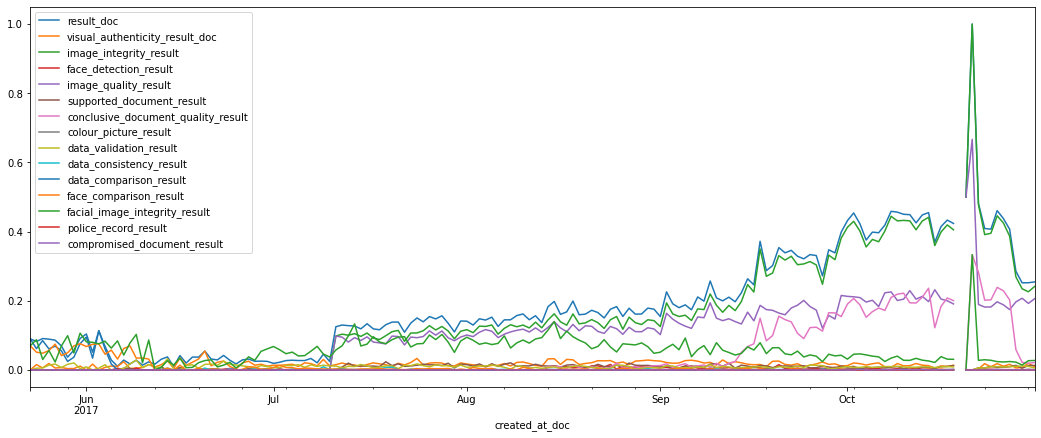

In [23]:
column_list2=['result_doc', "visual_authenticity_result_doc","image_integrity_result", "face_detection_result", 
             "image_quality_result","supported_document_result",'conclusive_document_quality_result',
             'colour_picture_result', 'data_validation_result','data_consistency_result','data_comparison_result',
             'face_comparison_result','facial_image_integrity_result','police_record_result','compromised_document_result']
fig=df.groupby(pd.Grouper(key='created_at_doc', freq='D'))[column_list2].mean().plot().get_figure()
fig.savefig('Breakdown Faliure Rate')

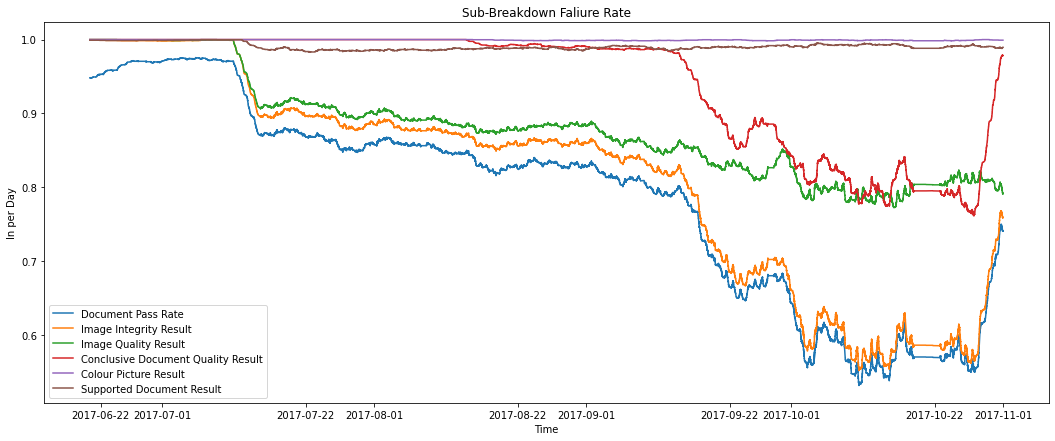

In [24]:
column_list3=['result_doc',"image_integrity_result", "image_quality_result",'conclusive_document_quality_result','colour_picture_result','supported_document_result']
rolling_plot_breakdown(column_list3,['Document Pass Rate','Image Integrity Result','Image Quality Result','Conclusive Document Quality Result','Colour Picture Result','Supported Document Result'],'Sub-Breakdown Faliure Rate')

### Clearly there is direct correlation in Image Integrity Result to Document Pass rate
  Breakdowns of Integrity Result: Supported Document, Image Quality, Colour Picture and Conclusive Document Quality 
  
  

# Checking and Analysing the 'Properties' field

In [25]:
df['properties_doc'] = df['properties_doc'].apply(lambda x: ast.literal_eval(x))

def construct_key():
    list1 = []
    for i in df['properties_doc']:
        for j in i:
            if j not in list1:
                list1.append(j)
    return list1

properties_key_list = construct_key()

def split(index, variable):
    dicts = df['properties_doc'][index]
    if variable in dicts:
            return dicts[variable]

def properties_column(properties_key_list):
    for i in properties_key_list:
        df[i]= df.index
        df[i] = df[i].apply(lambda x: split(x,i))
        
properties_column(properties_key_list)

In [26]:
df.head()

,user_id_doc,result_doc,visual_authenticity_result_doc,image_integrity_result,face_detection_result,image_quality_result,created_at_doc,supported_document_result,conclusive_document_quality_result,colour_picture_result,...,visual_authenticity_result_face,Pass,gender,document_type,date_of_expiry,issuing_country,nationality,issuing_date,issuing_state,document_version
0,3aee7324dfba466d96888ff9ad185b58,0,0.0,0.0,0.0,0.0,2017-05-23 15:13:02+00:00,0.0,0.0,0.0,...,0.0,True,Male,driving_licence,2027-01-05,GBR,None,None,None,None
1,206b6bd0cc114844b471fb750e1c9b8c,0,0.0,0.0,0.0,0.0,2017-05-23 15:18:05+00:00,0.0,0.0,0.0,...,0.0,False,Male,national_identity_card,2026-01-30,MLT,MLT,None,None,None
2,8edd77f60f8e4a739f35cb797b292e6d,0,0.0,0.0,0.0,0.0,2017-05-23 15:22:16+00:00,0.0,0.0,0.0,...,0.0,False,None,driving_licence,2024-10-21,ESP,None,None,None,None
3,636fb441d54446a8996e3ff79e09535f,1,0.0,0.0,0.0,0.0,2017-05-23 15:27:06+00:00,0.0,0.0,0.0,...,0.0,False,Female,national_identity_card,2021-03-20,PRT,PRT,None,None,None
4,fffa227d01064f9f9cef396d893863c1,0,0.0,0.0,0.0,0.0,2017-05-23 15:27:56+00:00,0.0,0.0,0.0,...,0.0,True,Male,driving_licence,2022-11-29,GBR,None,None,None,None


In [27]:
properties_key_list

['gender',
 'document_type',
 'date_of_expiry',
 'issuing_country',
 'nationality',
 'issuing_date',
 'issuing_state',
 'document_version']

## Checking for each Properties List Element

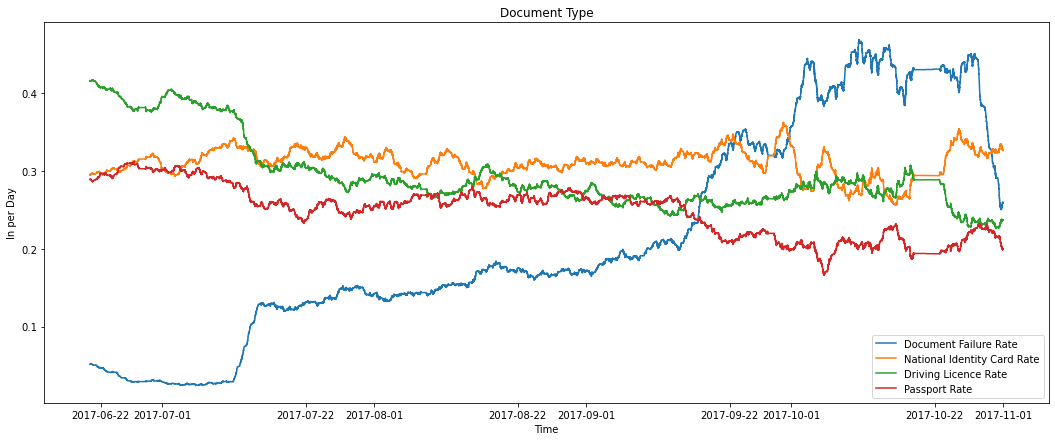

In [28]:
rolling_plot([df["result_doc"] != 0,df['document_type'] == 'national_identity_card', df['document_type'] == 'driving_licence',df['document_type'] == 'passport'],['Document Failure Rate','National Identity Card Rate','Driving Licence Rate','Passport Rate'],'Document Type')

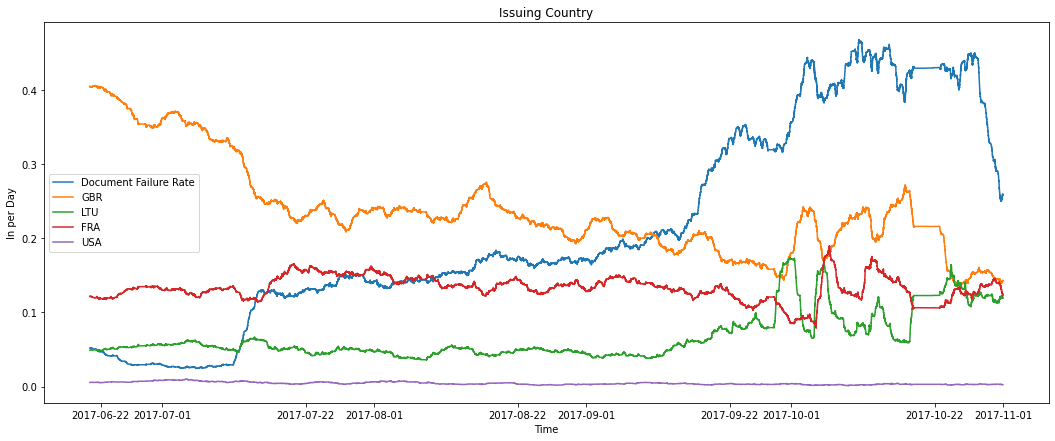

In [29]:
rolling_plot([df["result_doc"] != 0,df['issuing_country'] == 'GBR', df['issuing_country'] == 'LTU',df['issuing_country'] == 'FRA',df['issuing_country'] == 'USA'],['Document Failure Rate','GBR','LTU','FRA','USA'],'Issuing Country')

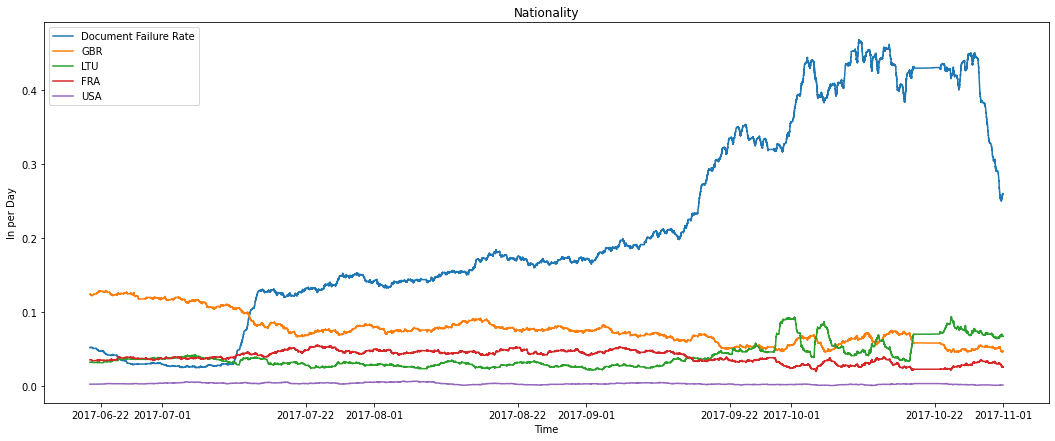

In [30]:
rolling_plot([df["result_doc"] != 0,df['nationality'] == 'GBR', df['nationality'] == 'LTU',df['nationality'] == 'FRA',df['nationality'] == 'USA'],['Document Failure Rate','GBR','LTU','FRA','USA'],'Nationality')

# Calculating Pass Rate

In [47]:
ax=df['user_id_doc'].value_counts()[:].reset_index()
ax.index=ax['index']
ax=ax.drop(['index'],axis=1)
## Number of attempts which were more than 2
ax[ax['user_id_doc']<2].count()

user_id_doc    110374
dtype: int64

In [32]:
# No. of People who cleared and failed Document checks
df['result_doc'].value_counts()

0    132402
1     44002
Name: result_doc, dtype: int64

In [33]:
# No. of People who cleared and failed Face checks
df['result_face'].value_counts()

0.0    165487
1.0     10917
Name: result_face, dtype: int64

In [34]:
# No. of People who cleared and failed both checks
df['Pass'].value_counts()

True     126891
False     49513
Name: Pass, dtype: int64

In [35]:
cleared_doc_checks = df['result_doc'].value_counts()[0]/len(df.index)
cleared_face_checks = df['result_face'].value_counts()[0]/len(df.index)
cleared_both = df['Pass'].value_counts()[True]/len(df.index)

In [36]:
[cleared_doc_checks,cleared_face_checks,cleared_both]

[0.7505612117639056, 0.9381136482165937, 0.7193204235731616]

In [37]:
df['Pass']

0          True
1         False
2         False
3         False
4          True
          ...  
176399     True
176400     True
176401     True
176402     True
176403    False
Name: Pass, Length: 176404, dtype: bool

### Pass Rates for period between '2017-07-14' & '2017-09-13'

In [38]:
upper2 = df["created_at_doc"] < '2017-09-13'
lower2 = df["created_at_doc"] > '2017-07-14'
cf=df[upper2 & lower2]
cf.reset_index(drop=True,inplace=True)
cleared_doc_checks2 = cf['result_doc'].value_counts()[0]/len(cf.index)
cleared_face_checks2 = cf['result_face'].value_counts()[0]/len(cf.index)
cleared_both2 = cf['Pass'].value_counts()[True]/len(cf.index)
[cleared_doc_checks2,cleared_face_checks2,cleared_both2]

[0.840704312538689, 0.9179448380218722, 0.7965334617236398]

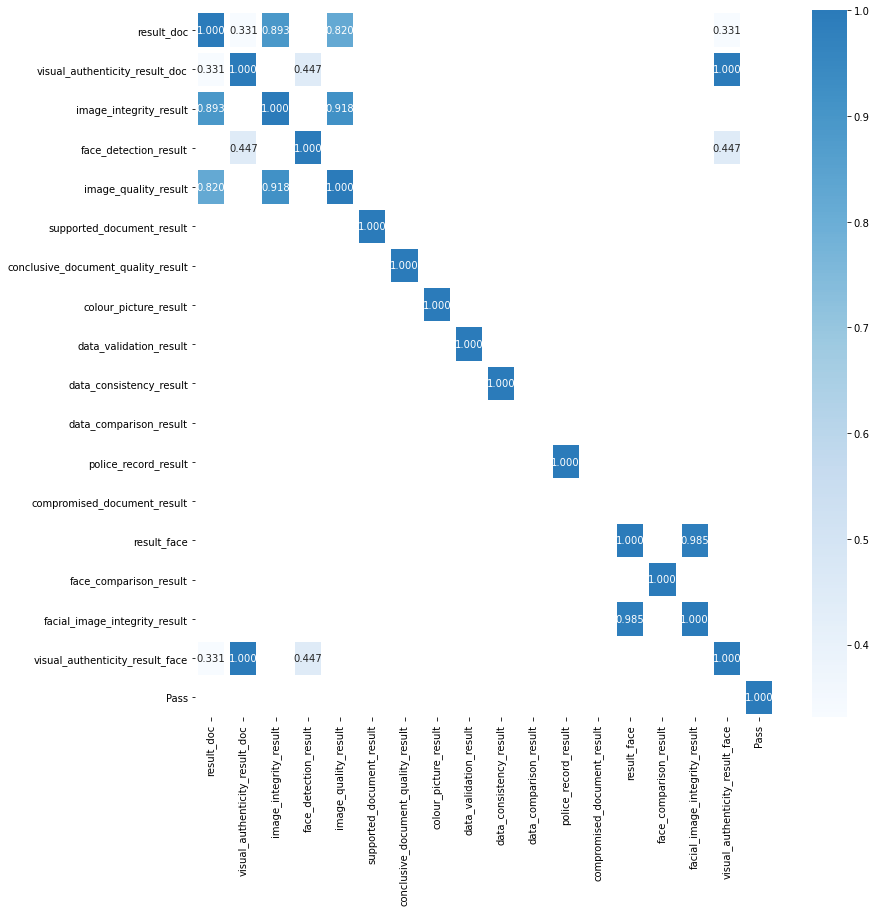

In [39]:
cf_corr_mat  = cf.corr(method='pearson')
cf_corr_mat = cf_corr_mat.apply(lambda x: [y if y >= 0.3 else np.nan for y in x])
f,ax = plt.subplots(figsize =(13,13))
sns.heatmap(cf_corr_mat, annot = True, linewidths = 5, fmt = '.3f', ax = ax, cmap='Blues', center=0.8)
plt.savefig('July-Sept Correlation Matrix.png')
plt.show()

### Pass Rates for period after '2017-09-13'

In [40]:
lower3 = df["created_at_doc"] > '2017-09-13'
ef=df[lower3]
ef.reset_index(drop=True,inplace=True)
cleared_doc_checks3 = ef['result_doc'].value_counts()[0]/len(ef.index)
cleared_face_checks3 = ef['result_face'].value_counts()[0]/len(ef.index)
cleared_both3 = ef['Pass'].value_counts()[True]/len(ef.index)
[cleared_doc_checks3,cleared_face_checks3,cleared_both3]

[0.6192414723359784, 0.9567267380393968, 0.6058135154512644]

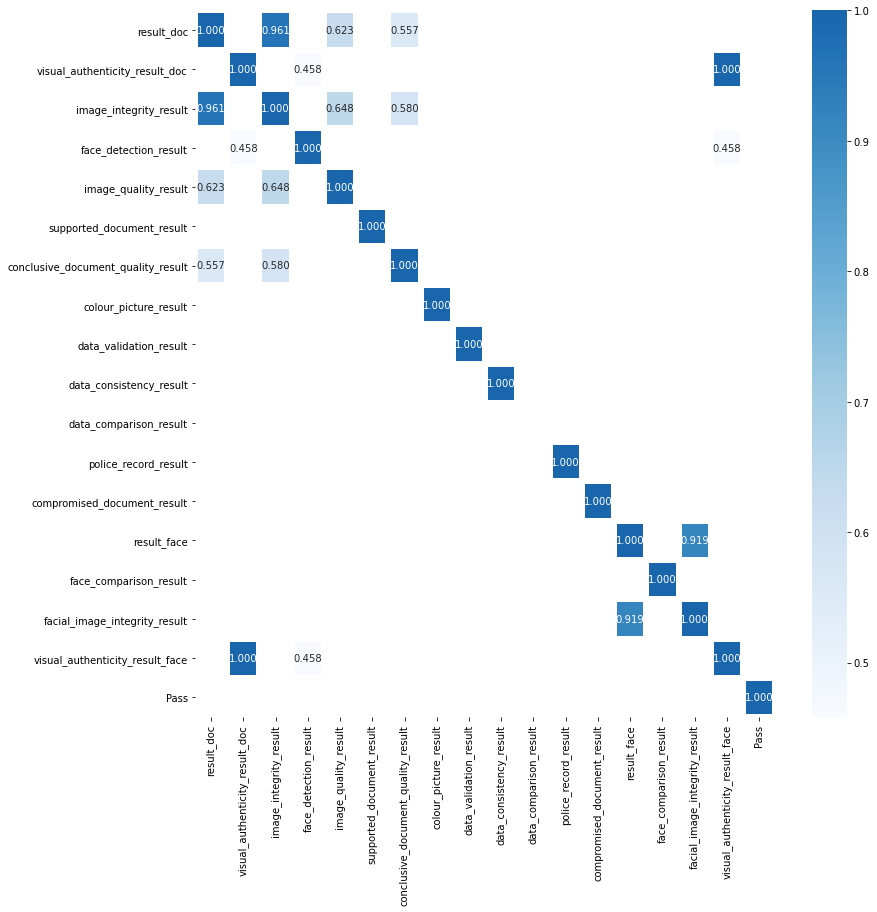

In [41]:
ef_corr_mat  = ef.corr(method='pearson')
ef_corr_mat = ef_corr_mat.apply(lambda x: [y if y >= 0.3 else np.nan for y in x])
f,ax = plt.subplots(figsize =(13,13))
sns.heatmap(ef_corr_mat, annot = True, linewidths = 5, fmt = '.3f', ax = ax, cmap='Blues', center=0.8)
plt.savefig('After Mid Sept Correlation Matrix.png')
plt.show()

### Pass Rates for period before '2017-07-14'

In [42]:
upper1 = df["created_at_doc"] < '2017-07-14'
ff=df[upper1]
ff.reset_index(drop=True,inplace=True)
cleared_doc_checks1 = ff['result_doc'].value_counts()[0]/len(ff.index)
cleared_face_checks1 = ff['result_face'].value_counts()[0]/len(ff.index)
cleared_both1 = ff['Pass'].value_counts()[True]/len(ff.index)
[cleared_doc_checks1,cleared_face_checks1,cleared_both1]

[0.9491549164254366, 0.935054626949295, 0.893360724624148]

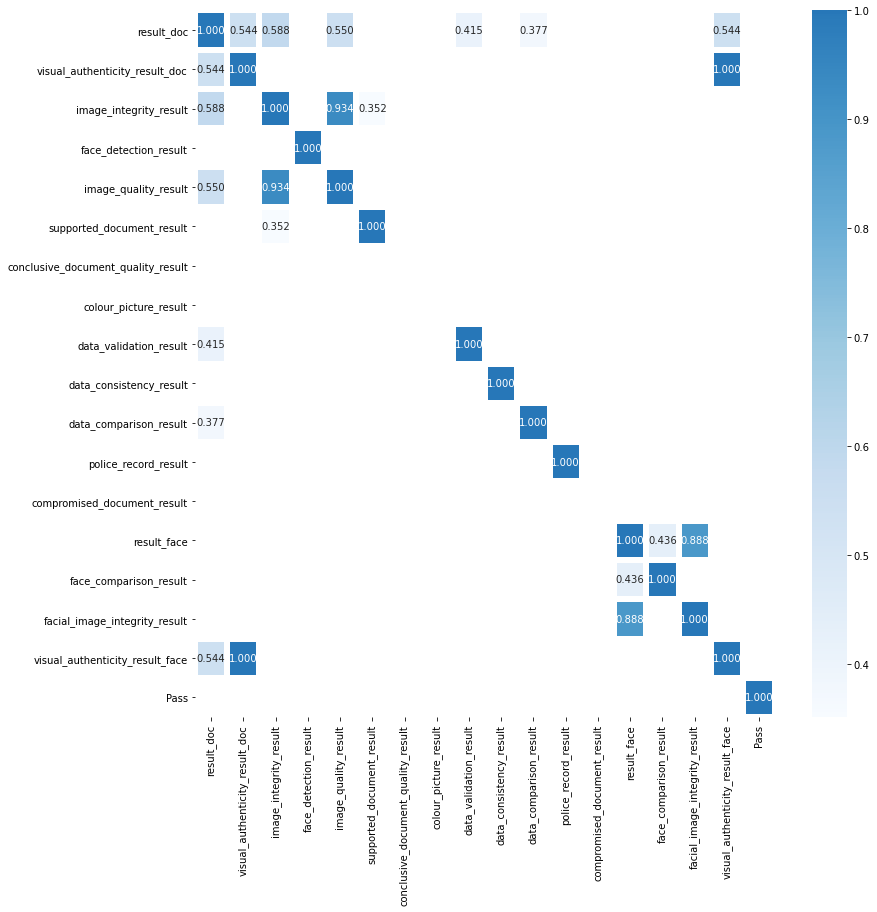

In [43]:
ff_corr_mat  = ff.corr(method='pearson')
ff_corr_mat = ff_corr_mat.apply(lambda x: [y if y >= 0.3 else np.nan for y in x])
f,ax = plt.subplots(figsize =(13,13))
sns.heatmap(ff_corr_mat, annot = True, linewidths = 5, fmt = '.3f', ax = ax, cmap='Blues', center=0.8)
plt.savefig('Before July Correlation Matrix.png')
plt.show()